# Insurance

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel

In [315]:
data = pd.read_csv(r"C:\Users\hp\Downloads\Data Science Projects\Insurance\insurance.csv")

In [316]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [317]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [318]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [319]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [320]:
data['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [321]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [322]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### Visualization

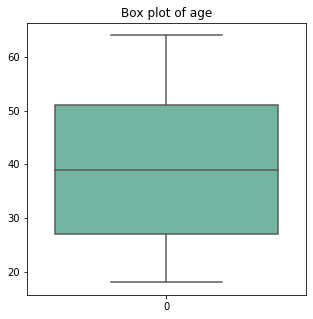

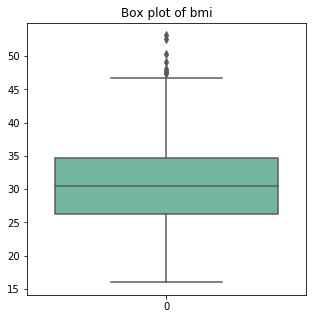

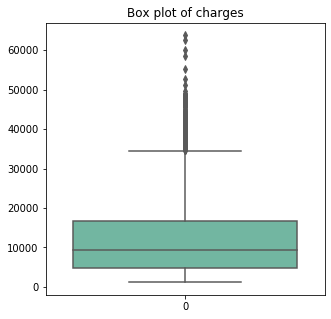

In [323]:
column = ['age', 'bmi', 'charges']

for i in column:
    plt.figure(figsize = (5,5))
    sns.boxplot(data = data[i], palette = 'Set2')
    plt.title("Box plot of " + i)

## Data Preprocessing

In [324]:
#Removing outliers
data['charges'] = (data["charges"]).rank()
data['bmi'] = (data["bmi"]).rank()

In [325]:
#One hot encoding

In [326]:
lis= ['sex', 'smoker', 'region', 'children']
for i in lis:
    dummy=pd.get_dummies(data[i], prefix=i)
    data=pd.concat([data,dummy], axis = 1)

In [328]:
data.head()

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,...,region_northeast,region_northwest,region_southeast,region_southwest,children_0,children_1,children_2,children_3,children_4,children_5
0,19,female,459.0,0,yes,southwest,1007.0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
1,18,male,943.5,1,no,southeast,59.0,0,1,1,...,0,0,1,0,0,1,0,0,0,0
2,28,male,879.5,3,no,southeast,308.0,0,1,1,...,0,0,1,0,0,0,0,1,0,0
3,33,male,124.0,0,no,northwest,1099.0,0,1,1,...,0,1,0,0,1,0,0,0,0,0
4,32,male,541.5,0,no,northwest,256.0,0,1,1,...,0,1,0,0,1,0,0,0,0,0


In [329]:
data = data.drop(['sex', 'smoker', 'region', 'children'], axis = 1)

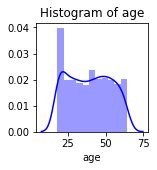

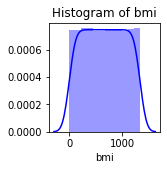

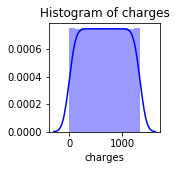

In [330]:
column = ['age', 'bmi', 'charges']
for i in column:
    plt.figure(figsize = (2,2))
    sns.distplot(data[i], color = 'b')
    plt.title("Histogram of " + i)
    plt.show()

In [331]:
#Min-Max Scaling

In [332]:
data["age"] = StandardScaler().fit_transform(data["age"].values.reshape(-1,1))
data["bmi"] = StandardScaler().fit_transform(data["bmi"].values.reshape(-1,1))

In [333]:
data.head()

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,children_0,children_1,children_2,children_3,children_4,children_5
0,-1.438764,-0.544990,1007.0,1,0,0,1,0,0,0,1,1,0,0,0,0,0
1,-1.509965,0.709394,59.0,0,1,1,0,0,0,1,0,0,1,0,0,0,0
2,-0.797954,0.543696,308.0,0,1,1,0,0,0,1,0,0,0,0,1,0,0
3,-0.441948,-1.412315,1099.0,0,1,1,0,0,1,0,0,1,0,0,0,0,0
4,-0.513149,-0.331396,256.0,0,1,1,0,0,1,0,0,1,0,0,0,0,0


In [334]:
data.describe()

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,children_0,children_1,children_2,children_3,children_4,children_5
count,1.338000e+03,1.338000e+03,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,-1.853691e-16,-1.427193e-17,669.50000,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900,0.428999,0.242152,0.179372,0.117339,0.018685,0.013453
std,1.000374e+00,1.000374e+00,386.39164,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995,0.495118,0.428546,0.383807,0.321945,0.135459,0.115247
min,-1.509965e+00,-1.730765e+00,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.691547e-01,-8.640880e-01,335.25000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.474046e-02,3.883542e-03,669.50000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.396738e-01,8.663534e-01,1003.75000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.765289e+00,1.730765e+00,1338.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [335]:
#Train-Test Data

In [336]:
y = data['charges']

In [337]:
data.drop(['charges'], axis = 1, inplace = True)

In [338]:
data.head()

,age,bmi,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,children_0,children_1,children_2,children_3,children_4,children_5
0,-1.438764,-0.544990,1,0,0,1,0,0,0,1,1,0,0,0,0,0
1,-1.509965,0.709394,0,1,1,0,0,0,1,0,0,1,0,0,0,0
2,-0.797954,0.543696,0,1,1,0,0,0,1,0,0,0,0,1,0,0
3,-0.441948,-1.412315,0,1,1,0,0,1,0,0,1,0,0,0,0,0
4,-0.513149,-0.331396,0,1,1,0,0,1,0,0,1,0,0,0,0,0


In [345]:
train_x,test_x,train_y,test_y = train_test_split(data ,y, test_size = 0.2,random_state = 50)

In [346]:
#Model

In [347]:
regressor = LinearRegression()  
regressor.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [349]:
y_pred = regressor.predict(test_x)

In [351]:
print(r2_score(y_pred,test_y)) 

0.7171218016715142


In [354]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Mean Absolute Error: 121.84363948393988
Mean Squared Error: 31654.838405293587
Root Mean Squared Error: 177.91806655113356
